# Seaborn

### Seaborn vs. Matplotlib

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [4]:
y

array([[  1.76405235,   0.40015721,   0.97873798,   2.2408932 ,
          1.86755799,  -0.97727788],
       [  2.71414076,   0.2488    ,   0.87551913,   2.6514917 ,
          2.01160156,   0.47699563],
       [  3.47517849,   0.37047502,   1.31938237,   2.98516603,
          3.50568063,   0.27183736],
       ...,
       [-34.82533536, -44.37245964, -32.86660099,  31.93843765,
          9.67250307,  -9.16537805],
       [-35.4875268 , -45.95006671, -33.20716103,  30.63521756,
         10.13925372,  -9.00427173],
       [-35.16749487, -43.87089005, -34.11462701,  30.44281336,
          8.92673797,  -9.08487024]])

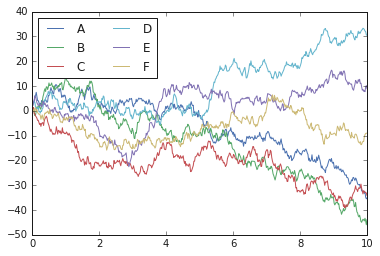

In [5]:
# Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

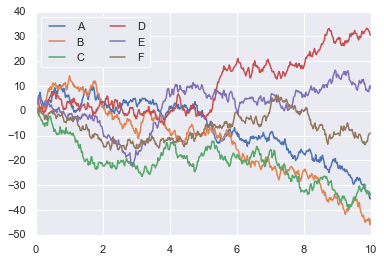

In [6]:
# seaborn style 적용
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms, KDE

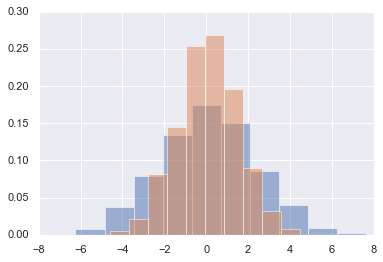

In [8]:
# histogram

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

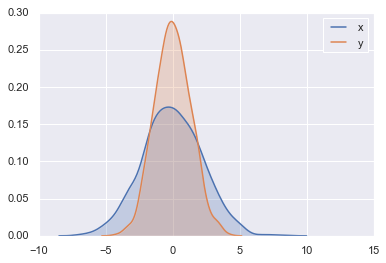

In [11]:
# KDE(kernel density estimation) plot
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

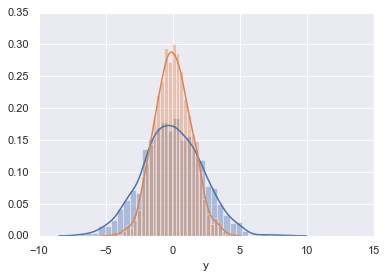

In [12]:
# histogram + KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

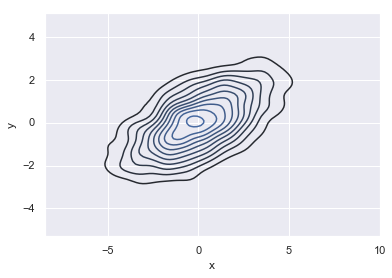

In [14]:
# 2D KDE
sns.kdeplot(data['x'], data['y']);

### joinplot

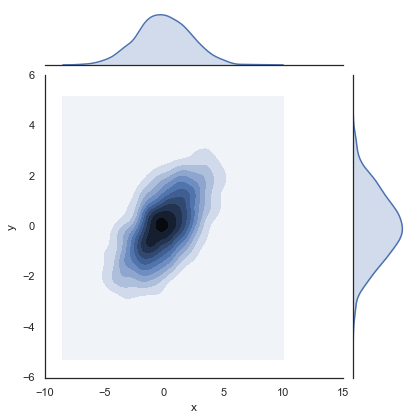

In [15]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

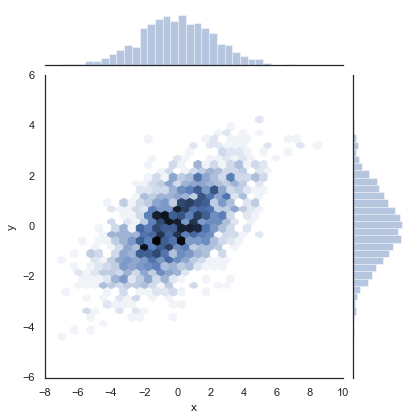

In [16]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

In [17]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

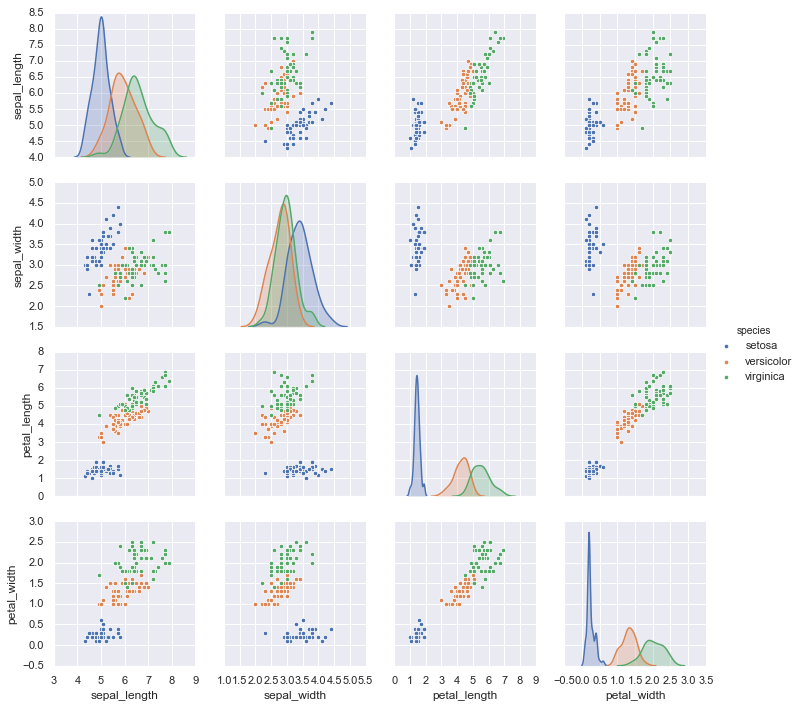

In [19]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

- grid

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


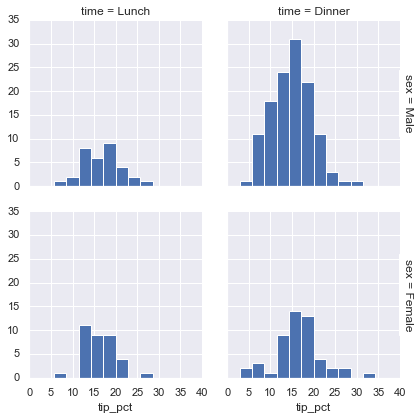

In [24]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Categorical plots

- boxplot

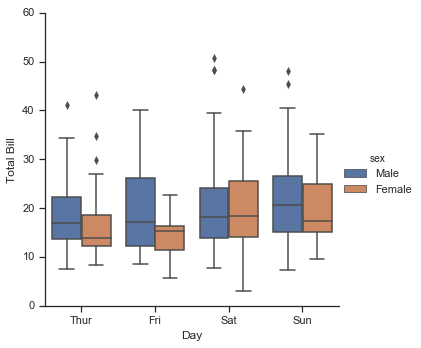

In [32]:
# kind = 'box'
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

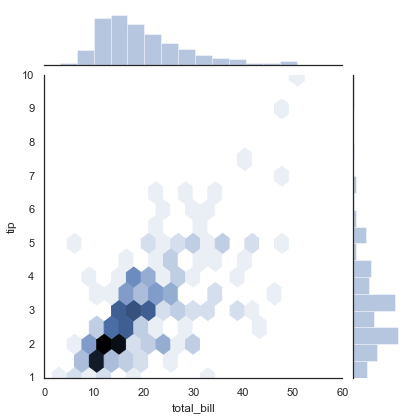

In [27]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

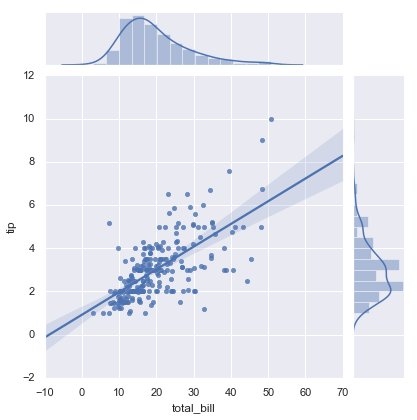

In [28]:
# regression line 

sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

In [29]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


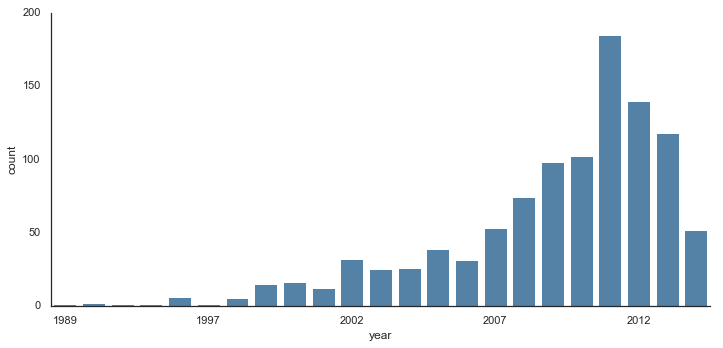

In [33]:
# kind = 'count'

with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

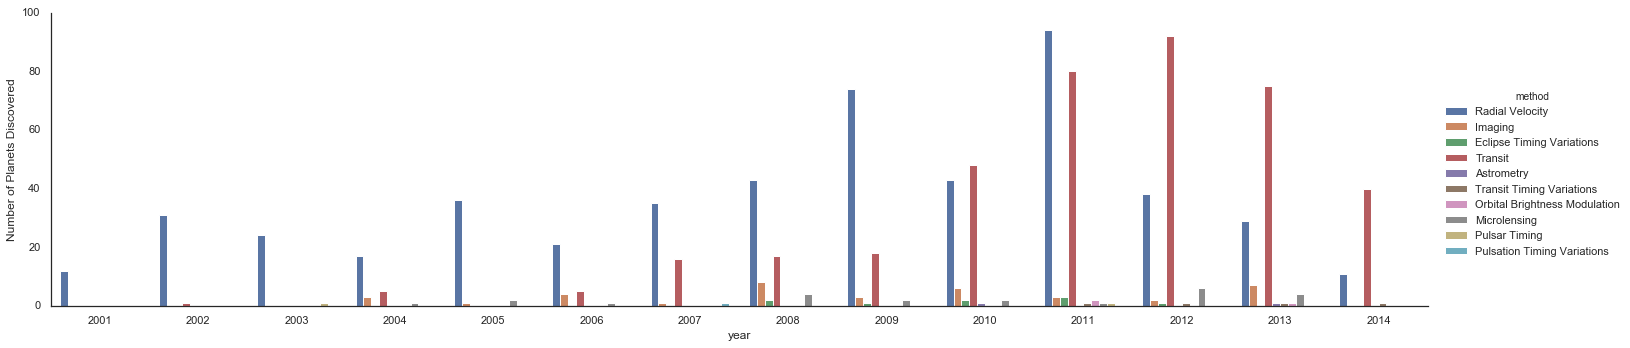

In [37]:
# hue='method' : method 별로 구분 
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### violin plot

In [54]:
import pandas as pd
import io
import requests

content=requests.get('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv').content
data = pd.read_csv(io.StringIO(content.decode('utf-8')))
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [55]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [56]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return h*60*60 + m*60 + s

data['split'] = data['split'].apply(convert_time)
data['final'] = data['final'].apply(convert_time)
data.head()

,age,gender,split,final
0,33,M,3938,7731
1,32,M,3986,7768
2,31,M,4009,7842
3,38,M,3976,8025
4,31,M,3992,8039


In [57]:
data.dtypes

age        int64
gender    object
split      int64
final      int64
dtype: object

In [60]:
data['split_frac'] = 1 - 2 * data['split'] / data['final']
data.head()

,age,gender,split,final,split_frac
0,33,M,3938,7731,-0.018756
1,32,M,3986,7768,-0.026262
2,31,M,4009,7842,-0.022443
3,38,M,3976,8025,0.009097
4,31,M,3992,8039,0.006842


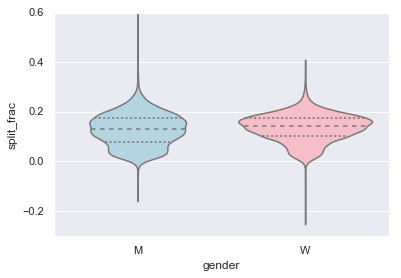

In [62]:
sns.violinplot("gender", "split_frac", data=data, inner="quartile",
               palette=["lightblue", "lightpink"]);

### lmplot

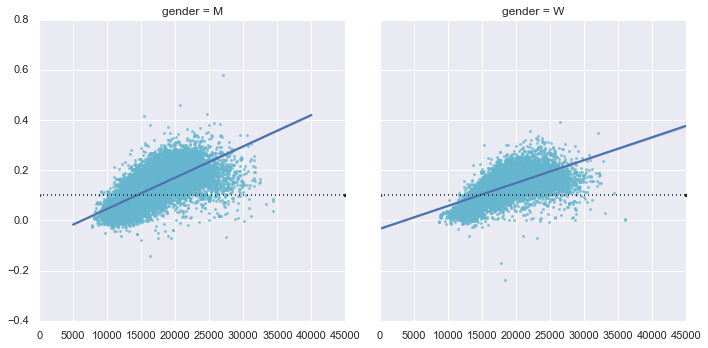

In [64]:
g = sns.lmplot('final', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");